#### A / B Testing

* Discrete metrics
    - Fisher's exact test
    - Pearson's chi-squared test

* Continous metrics
    - Z-test
    - Student's t-test
    - Welch's t-test
    - Mann-Whitney U test

* Data distrbution VS Stats distribution

In [11]:
# Dependencies & set-up
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu, norm, t, ttest_ind
from scipy.special import binom

sns.set()

In [12]:
# Discrete Methods
#   We randomly show visitors one of two possible designs of an ad
#   We need to determine whether our data significantly contradict the hypothesis 
#   Hypothosis: the two designs are equivalently efficient.

# Let's say that from we collected the following information.

# n(x) = 30 visitors saw the advertisement A, and 7 of them clicked on it.
# n(y) = 38 visitors saw the advertisement B, and 15 of them clicked on it.

np.random.seed(42)

x = np.random.binomial(n = 1, p = 0.6, size = 15)
y = np.random.binomial(n = 1, p = 0.4, size = 19)


_, (a, c) = np.unique(x, return_counts = True)
_, (b, d) = np.unique(y, return_counts = True)

df = pd.DataFrame(data = [[a, b], [c, d]], index = ['click', 'no-click'], columns = ['A', 'B'])
m = df.values

print('Contingency Table')
df

Contingency Table


,A,B
click,7,15
no-click,8,4


In [13]:
# Fisher's exact test 
#  with a 2x2 contingency table we can use Fisher's exact test to compute an exact p-value and test the  hypothesis.

def pmf_hypo(k, K, n, N):
    # Hypogeometric dist PMF
    return binom(K, k) * binom(N - K, n - k) / binom(N, n)

def fisher_p(m):
    # Probability of a given contingency table
    ((a, b), (c, d)) = m
    k = a
    K = a + b
    n = a + c
    N = a + b + c + d

    return pmf_hypo(k, K, n, N)

def fisher_hist(m):
    # PMF hist from Fisher test
    negative = -min(m[0, 0], m[1, 1])
    positive = min(m[1, 0], m[1, 0])
    prob = []
    for k in range(negative, positive + 1):
        m1 = m + np.array([[1, -1], [-1, 1]]) * k
        prob.append(fisher_p(m1))
    return prob

- Fisher's test: p-val = 7.5%


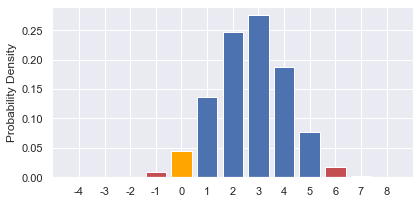

In [15]:
bars_h = np.array(fisher_hist(m))
idx = bars_h <= fisher_p(m)
ii = np.arange(len(bars_h))
pos = min(m[1, 0], m[0, 1])
neg = -min(m[0, 0], m[1, 1])
p_val = bars_h[idx].sum()

fig, ax = plt.subplots(figsize = (6, 3))
ax.bar(ii, bars_h)
ax.bar(ii[idx], bars_h[idx], color = 'r')
ax.bar(ii[-neg], bars_h[-neg], color = 'orange')

ax.set_xticks(ii)
ax.set_xticklabels(np.arange(neg, pos + 1))
ax.set_ylabel('Probability Density')
fig.tight_layout()


print(f"- Fisher's test: p-val = {100 * p_val:.1f}%")